# Food Delivery Cost and Profitability Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


##### The dataset contains 1000 rows and 12 columns with column "Discount and Offers" having some Null values which simply indicates that there were some orders where no discounts and offers were applied.

## Data Cleaning and Preparation

#### Replacing Null Values with "Zero"

In [4]:
food_orders["Discounts and Offers"].fillna("Zero", inplace = True)
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,Zero,146,27,0
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0


#### Convert “Discounts and Offers” to a consistent numeric value (if applicable).

In [5]:
# creating a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if "off" in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif "%" in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])/100
    else:
        # No discount
        return 0.0

# apply the function to create a new 'Discount Value' column
food_orders["Discount Value"] = food_orders["Discounts and Offers"].apply(lambda x: extract_discount(x))
food_orders.head()


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Value
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0,0.05
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0,0.10
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0,0.15
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,Zero,146,27,0,0.00
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.00


In [6]:
# Calculate the discount amount based on the order value and discount value
food_orders["Discount Amount"] = food_orders.apply(lambda x: (x["Order Value"] * x["Discount Value"] )
                                                   if x["Discount Value"] < 1
                                                   else x["Discount Value"], axis=1)
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Value,Discount Amount
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0,0.10,98.60
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,Zero,146,27,0,0.00,0.00
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.00,50.00


In [7]:
print(food_orders.dtypes)

Order ID                    int64
Customer ID                object
Restaurant ID              object
Order Date and Time        object
Delivery Date and Time     object
Order Value                 int64
Delivery Fee                int64
Payment Method             object
Discounts and Offers       object
Commission Fee              int64
Payment Processing Fee      int64
Refunds/Chargebacks         int64
Discount Value            float64
Discount Amount           float64
dtype: object


##### The data is now ready with the following adjustments:

##### A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.
##### Discount Value has been added to represent the discount rate or fixed amount discount directly.

## Cost and Profitability Analysis 

##### For cost analysis, we'll consider the following cost associated with each order.

Delivery Fee: The fee charged for delivering the order.

Payment Processing Fee: The fee for processing the payment

Discount Amount: The discount provided on the order.


##### We'll calculate the total costs by aggregating all theese costs associated with each order on the platform.
##### The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [8]:
# calculate total costs and revenue per order
food_orders["Total Costs"] = food_orders["Delivery Fee"] + food_orders["Payment Processing Fee"] + food_orders["Discount Amount"]
food_orders["Revenue"] = food_orders["Commission Fee"]
food_orders["Profit"] = food_orders["Revenue"] - food_orders["Total Costs"]

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders["Revenue"].sum()
total_costs = food_orders["Total Costs"].sum()
total_profit = food_orders["Profit"].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 132741.85, 'Total Profit': -5751.85}


##### The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

##### Let's plot some more graphs for our better understanding of distribution of costs, revenue, and profits.

## Profits per Order

##### A histogram to visualize the distribution of profitable orders.

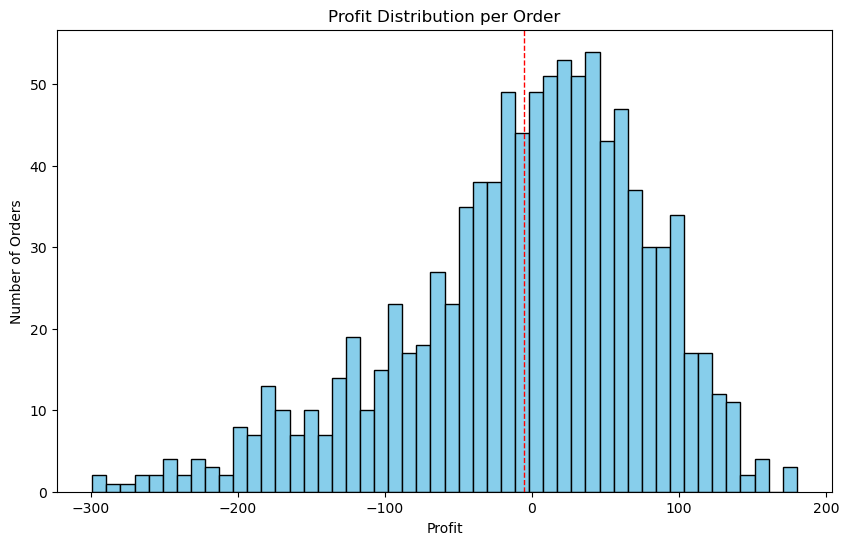

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(food_orders["Profit"], bins=50, color="skyblue", edgecolor="black")
plt.title("Profit Distribution per Order")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.axvline(food_orders["Profit"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

##### This shows a wide distribution of profit distribution per order, and a large number of orders resulting in loss. The line represents the average profit, which is also in the negative, highlighting the overall loss making situation.

## Total Costs by Type of Costs

##### A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).

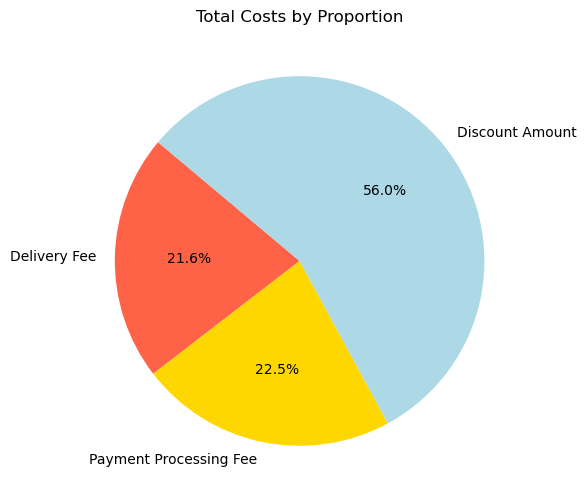

In [10]:
costs_proportion = food_orders[["Delivery Fee", "Payment Processing Fee", "Discount Amount"]].sum()
plt.figure(figsize=(6, 6))
plt.pie(costs_proportion, labels=costs_proportion.index, autopct="%1.1f%%", startangle=140, colors=["tomato", "gold", "lightblue"])
plt.title("Total Costs by Proportion")
plt.show()

##### The pie chart is showcasing the breakdown of Total Costs. It clearly tells us that Discount Amount constitutes a very significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

## Total Revenue, Costs, and Profit(Loss)

##### A bar chart to compare total revenue, total costs, and total profit

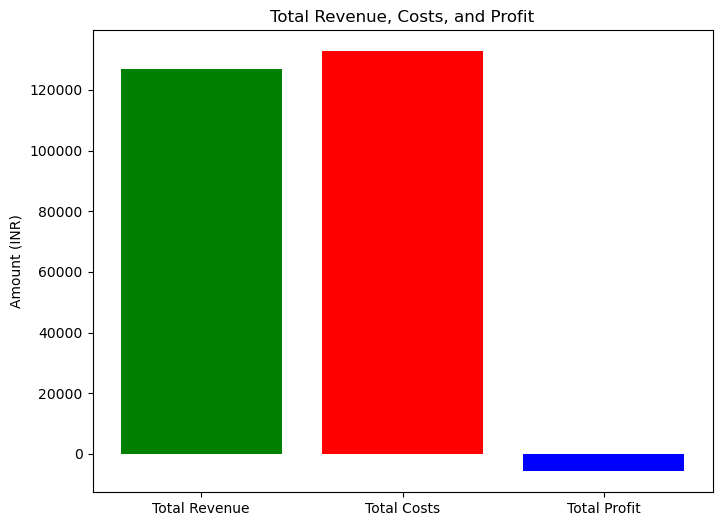

In [11]:
totals = ["Total Revenue", "Total Costs", "Total Profit"]
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title("Total Revenue, Costs, and Profit")
plt.ylabel("Amount (INR)")
plt.show()

##### It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

## New Strategy For Profits

##### We have analysed that high Discount Amounts on food orders are rsulting in overall losses. So, we need to find a new strategy for profitability, and we also need to find new optimized Discount Amounts and Comission fees.

##### We can analyse the profitable orders to find out new optimized Discount Amounts and Comission Fees. Specifically, we could look for:
##### 1.A new average commission percentage based on profitable orders.
##### 2.A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

### New Average Comission and Discount Percentage 

In [12]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders["Profit"] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders["Commission Percentage"] = (profitable_orders["Commission Fee"] / profitable_orders["Order Value"]) * 100

# calculate the average discount percentage for profitable orders
profitable_orders["Effective Discount Percentage"] = (profitable_orders["Discount Amount"] / profitable_orders["Order Value"]) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders["Commission Percentage"].mean()
new_avg_discount_percentage = profitable_orders["Effective Discount Percentage"].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

27.706528082159736 5.623712042253798


C:\Users\Ayush\AppData\Local\Temp\ipykernel_9020\3787926927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders["Commission Percentage"] = (profitable_orders["Commission Fee"] / profitable_orders["Order Value"]) * 100
C:\Users\Ayush\AppData\Local\Temp\ipykernel_9020\3787926927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders["Effective Discount Percentage"] = (profitable_orders["Discount Amount"] / profitable_orders["Order Value"]) * 100


##### Based on our analysis of profitable orders, we have found new Average Commission and Average Discount Percentage
##### New Average Commission Percentage: 27.70%
##### New Average Discount Percentage: 5.62%

##### The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

## Actual vs Simulated Profitability

##### Calculate the Actual Profitability using actual discounts and commissions.
##### Calculate the Simulated Profitabilty using New Average Commission (28%) and Average Discount (6%) percentage

##### It will help us to visualize the impact of New Average Commission and Discount Percentage on the profitablity per order against the actual profitabilty per order.

In [13]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 28  # 28%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders["Simulated Commission Fee"] = food_orders["Order Value"] * (recommended_commission_percentage / 100)
food_orders["Simulated Discount Amount"] = food_orders["Order Value"] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders["Simulated Total Costs"] = (food_orders["Delivery Fee"] +
                                        food_orders["Payment Processing Fee"] +
                                        food_orders["Simulated Discount Amount"])

food_orders["Simulated Profit"] = (food_orders["Simulated Commission Fee"] -
                                   food_orders["Simulated Total Costs"])

food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,Discount Value,Discount Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount,Simulated Total Costs,Simulated Profit
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,...,0,0.05,95.70,142.70,150,7.30,535.92,114.84,161.84,374.08
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,...,0,0.10,98.60,161.60,198,36.40,276.08,59.16,122.16,153.92
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,...,0,0.15,140.55,215.55,195,-20.55,262.36,56.22,131.22,131.14
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,Zero,146,...,0,0.00,0.00,77.00,146,69.00,409.64,87.78,164.78,244.86
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,...,0,50.00,50.00,130.00,130,0.00,557.76,119.52,199.52,358.24


In [14]:
# aggregate data to get overall metrics
total_orders_simulated = food_orders.shape[0]
total_revenue_simulated = food_orders["Simulated Commission Fee"].sum()
total_costs_simulated = food_orders["Simulated Total Costs"].sum()
total_profit_simulated = food_orders["Simulated Profit"].sum()

overall_metrics_simulated = {
    "Total Orders Simulated": total_orders_simulated,
    "Total Revenue Simulated": total_revenue_simulated,
    "Total Costs Simulated": total_costs_simulated,
    "Total Profit Simulated": total_profit_simulated
}
print(overall_metrics_simulated)

{'Total Orders Simulated': 1000, 'Total Revenue Simulated': 295111.32000000007, 'Total Costs Simulated': 121690.14, 'Total Profit Simulated': 173421.18000000002}


C:\Users\Ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


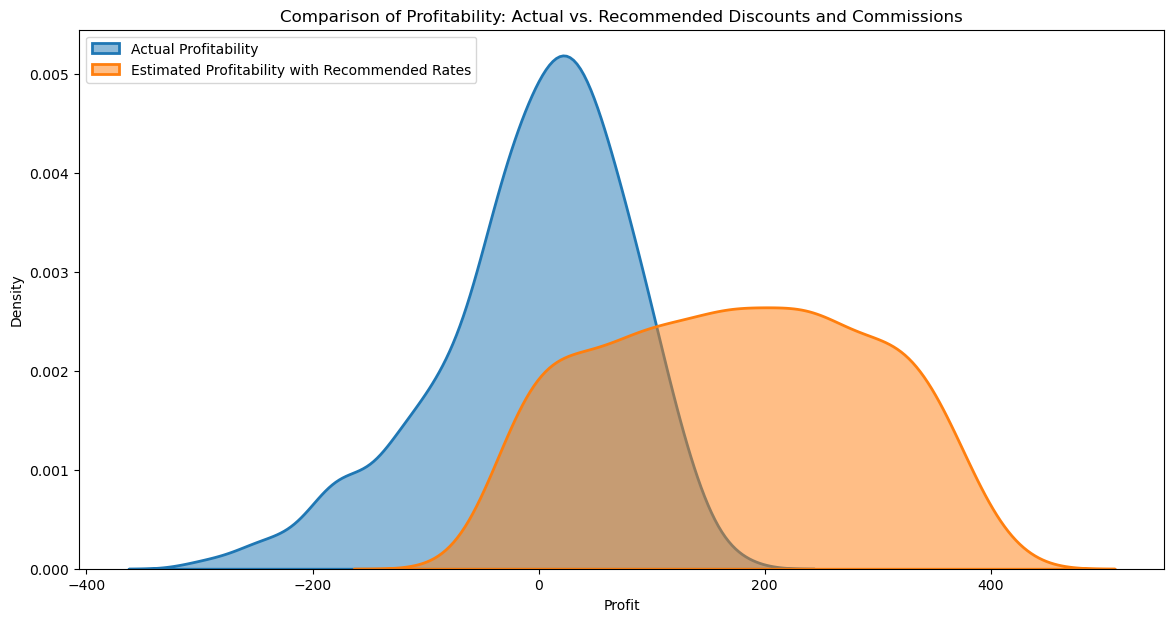

In [15]:
plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders["Profit"], label="Actual Profitability", fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders["Simulated Profit"], label="Estimated Profitability with Recommended Rates", fill=True, alpha=0.5, linewidth=2)

plt.title("Comparison of Profitability: Actual vs. Recommended Discounts and Commissions")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.show()

##### This visualization compares the actual profitability per order versus the simulated profitability per order with recommended Commission (28%) and Discount (6%) percentage.

##### The current profitability distribution reveals a diverse range of outcomes, with many orders experiencing losses (profit < 0) and a wide variety of profit margins. In contrast, the simulated scenario demonstrates a notable shift towards increased profitability per order. This new distribution leans more towards positive profits, suggesting that the proposed adjustments may result in a higher percentage of profitable orders.